# Cheese classifier

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'CheeseClassifier/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Get the data

In [0]:
folder = 'camembert'
file = folder+'.csv'

In [0]:
folder = 'cantal'
file = folder+'.csv'

In [0]:
folder = 'reblochon'
file = folder+'.csv'

In [0]:
folder = 'edam'
file = folder+'.csv'

In [0]:
folder = 'bleu_auvergne'
file = folder+'.csv'

In [0]:
path = Path(base_dir + 'data/cheeses')

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

## Verify data

In [0]:
classes = ['camembert','cantal','reblochon','edam','bleu_auvergne']

Verify if data is valide and delete invalide instances

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

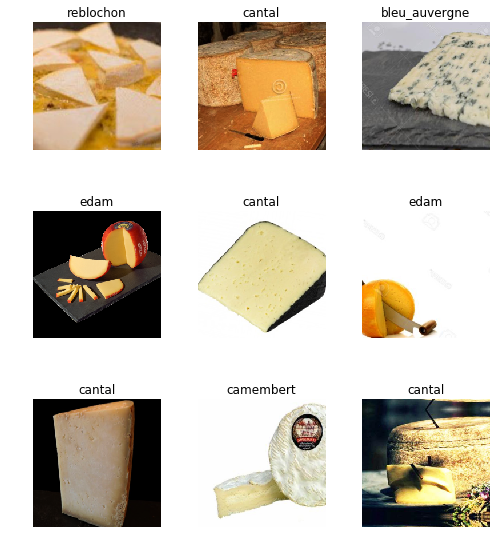

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bleu_auvergne', 'camembert', 'cantal', 'edam', 'reblochon'], 5, 768, 192)

## Train model

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27491598.12it/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.616215,0.828388,0.754717,01:01
1,1.045008,0.441145,0.811321,00:13
2,0.787202,0.408344,0.823899,00:12
3,0.636109,0.395215,0.830189,00:12


In [0]:
learn.save('stage_1')

In [0]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


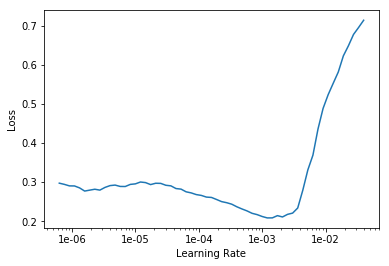

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.298318,0.294617,0.893082,00:13
1,0.229007,0.372802,0.893082,00:13
2,0.186262,0.281982,0.918239,00:13
3,0.149754,0.224772,0.924528,00:13


In [0]:
learn.save('stage_2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

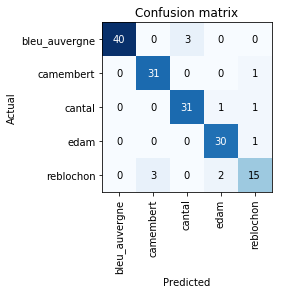

In [0]:
interp.plot_confusion_matrix()

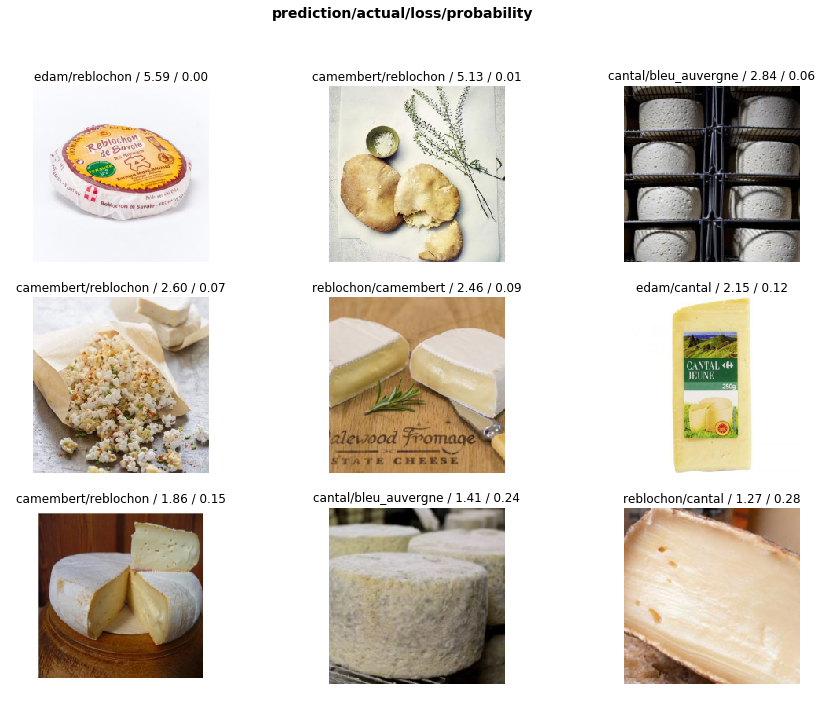

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

## Production

In [0]:
learn.export()